# Problem 2.3.1
Repeat the calculations in [IntroML/Examples/Chapter2/MatplotlibHeatmapDemo.ipynb](https://github.com/satishchandrareddy/IntroML/blob/master/Examples/Chapter2/MatplotlibHeatmapDemo.ipynb) for the case:

$f(X) = \begin{cases} 0 &\mbox{if } X_1 - (X_0 -0.5)^2 -0.35 > 0 \\
1 & \mbox{if } X_1 - (X_0 -0.5)^2 - 0.35 \le 0 \end{cases}$

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def func_Y(X):
    # generate function of 0 and 1: Y=1 if X1 + (X0-0.5)^2 -0.35 <=0 and Y=0 if X1 + (X0-0.5)^2 -0.35 >0
    Y = (X[1,:] - (X[0,:] - 0.5)**2 - 0.35 <= 0).astype(float)
    # add axis so Y is row vector
    Y = np.expand_dims(Y,axis=0)
    return Y

In [63]:
# apply Y function to generate 0 and 1
Yout = func_Y(Xmatrix)
print("Yout: {}".format(Yout))
# Convert to 3x3 grid
Ygrid = np.reshape(Yout,(npoints,npoints))
print("Ygrid: \n{}".format(Ygrid))

Yout: [[1. 1. 1. ... 0. 0. 0.]]
Ygrid: 
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


X.shape: (2, 10)
X: 
[[0.99689661 0.56841317 0.00626466 0.92638092 0.00674325 0.55256873
  0.10310029 0.53382081 0.85648816 0.2015723 ]
 [0.54303983 0.60646759 0.56320633 0.07971098 0.94215161 0.60956247
  0.13093024 0.03915193 0.72334447 0.20973655]]
Y.shape: (1, 10)
Y: 
[[1. 0. 1. 1. 0. 0. 1. 1. 0. 1.]]


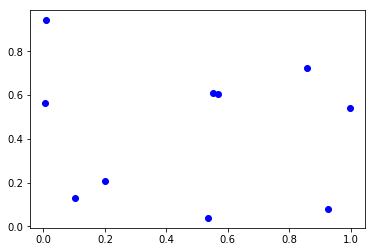

In [64]:
# (1) set up training data randomly chosen from uniform distribution in (0,1)
# X is 2d array of dimension (2,m), Y is 2d array of 0 or 1 of dimension (1,m)
nfeature = 2
m = 10
X = np.random.rand(nfeature,m)
Y = func_Y(X)
print("X.shape: {}".format(X.shape))
print("X: \n{}".format(X))
print("Y.shape: {}".format(Y.shape))
print("Y: \n{}".format(Y))
plt.plot(X[0,:],X[1,:],"bo")

Text(0, 0.5, 'X1')

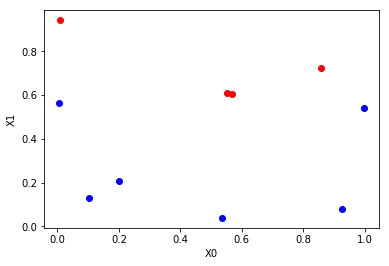

In [65]:
# (2) plot training data
# red = 0, 1 = blue, use np.where to determine index where Y = 0 and Y = 1
idx_0 = np.where(np.squeeze(np.absolute(Y-0))<1e-7)
idx_1 = np.where(np.squeeze(np.absolute(Y-1))<1e-7)
plt.plot(np.squeeze(X[0,idx_0]),np.squeeze(X[1,idx_0]),"ro",label="Training Data: Label=0")
plt.plot(np.squeeze(X[0,idx_1]),np.squeeze(X[1,idx_1]),"bo",label="Training Data: Label=1")
plt.xlabel("X0")
plt.ylabel("X1")

In [66]:
# simple example points 0.25, 0.50, 0.75 in x0 and x1 directions
npoints = 3
# create 1d grids of points between 0.25 and 0.75
X0=np.linspace(0.25,0.75,npoints)
X1=np.linspace(0.25,0.75,npoints)
print("X0: {}".format(X0))
print("X1: {}".format(X1))

X0: [0.25 0.5  0.75]
X1: [0.25 0.5  0.75]


In [67]:
# create meshgrids - X0grid = X0 points for grid, X1grid = X1 points for grid
X0grid,X1grid=np.meshgrid(X0,X1)
print("x0grid: \n{}".format(X0grid))
print("x1grid: \n{}".format(X1grid))

x0grid: 
[[0.25 0.5  0.75]
 [0.25 0.5  0.75]
 [0.25 0.5  0.75]]
x1grid: 
[[0.25 0.25 0.25]
 [0.5  0.5  0.5 ]
 [0.75 0.75 0.75]]


x0reshape: [[0.25 0.5  0.75 0.25 0.5  0.75 0.25 0.5  0.75]]
x1reshape: [[0.25 0.25 0.25 0.5  0.5  0.5  0.75 0.75 0.75]]
Xmatrix: 
[[0.25 0.5  0.75 0.25 0.5  0.75 0.25 0.5  0.75]
 [0.25 0.25 0.25 0.5  0.5  0.5  0.75 0.75 0.75]]


Text(0, 0.5, 'X1')

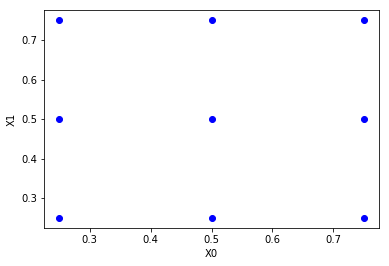

In [68]:
# convert meshgrids into row vectors
X0reshape=np.reshape(X0grid,(1,npoints*npoints))
X1reshape=np.reshape(X1grid,(1,npoints*npoints))
print("x0reshape: {}".format(X0reshape))
print("x1reshape: {}".format(X1reshape))
# concatenate into 2x9 matrix in order be able to use func_Y
Xmatrix = np.concatenate((X0reshape,X1reshape),axis=0)
print("Xmatrix: \n{}".format(Xmatrix))
plt.plot(Xmatrix[0,:],Xmatrix[1,:],"bo")
plt.xlabel("X0")
plt.ylabel("X1")

In [69]:
# apply Y function to generate 0 and 1
Yout = func_Y(Xmatrix)
print("Yout: {}".format(Yout))
# Convert to 3x3 grid
Ygrid = np.reshape(Yout,(npoints,npoints))
print("Ygrid: \n{}".format(Ygrid))

Yout: [[1. 1. 1. 0. 0. 0. 0. 0. 0.]]
Ygrid: 
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


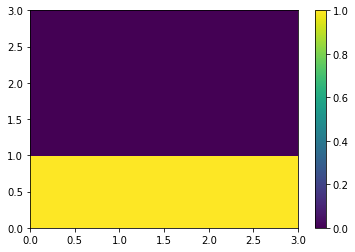

In [70]:
# use pcolormesh to create heatmap
plt.pcolormesh(Ygrid)
# plot colorbar
plt.colorbar()

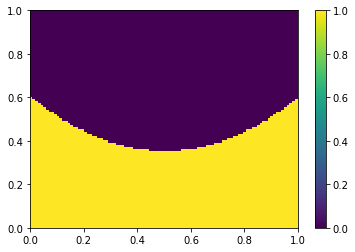

In [71]:
# create a heatmap
npoints = 100
# create 1d grids in x0 and x1 directions
X0lin = np.linspace(0,1,npoints)
X1lin = np.linspace(0,1,npoints)
# create 2d grids for x0 and x1 and reshape into 1d grids 
X0grid,X1grid = np.meshgrid(X0lin,X1lin)
# convert to 1d grids
X0reshape = np.reshape(X0grid,(1,npoints*npoints))
X1reshape = np.reshape(X1grid,(1,npoints*npoints))
# Feature matrix is (2,npoints*npoints)
Xmatrix = np.concatenate((X0reshape,X1reshape),axis=0)
# compute Y
Yout = func_Y(Xmatrix)
# reshape Yout results into 2d grid and plot heatmap
heatmap = np.reshape(Yout,(npoints,npoints))
# heat map takes in 2d grids for X0, X1, and Y values
plt.pcolormesh(X0grid,X1grid,heatmap)
plt.colorbar()

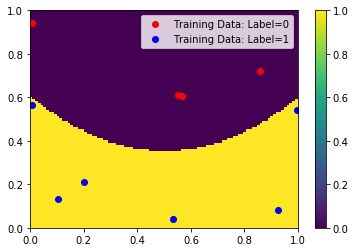

In [72]:
# plot data and heat map on same plot (data will be training data and heatmap will show results of machine learning)
plt.plot(np.squeeze(X[0,idx_0]),np.squeeze(X[1,idx_0]),"ro",label="Training Data: Label=0")
plt.plot(np.squeeze(X[0,idx_1]),np.squeeze(X[1,idx_1]),"bo",label="Training Data: Label=1")
plt.pcolormesh(X0grid,X1grid,heatmap)
plt.colorbar()
plt.legend()